In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
#해당 변수값들을 설정하면 해당 연도/계절/요일의 수요,공급예측 및 oversupply를 출력한다.
YEAR = 2034
SEASON = 2   #   0 : spring     1 : summer    2 : fall    3 : winter
DAY = 0   # 0 : weekday       1 : weekend
season = ['spring','summer','fall','winter']
day = ['weekday','winter']

In [10]:
demand = pd.read_csv("한국전력거래소_시간별 제주 전력수요량_20211231.csv", encoding='CP949',index_col = '거래일자', dayfirst=False, parse_dates=True)

In [11]:
#column의 이름을 ['1시', '2시', '3시',...] 에서 [1,2,3...]으로 바꾸기 위한 코드
name = {}
for i in range(24):
    name[f'{i+1}시'] = i+1 #name = {'0시':0, '1시':1, '2시':2, .... ,'23시':23}
    
demand = demand.rename(columns = name)

In [12]:
demand = demand.drop(demand.index[:5114])

In [13]:
demand #재생E 고려 전 NET DEMAND

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
거래일자,,,,,,,,,,,,,,,,,,,,,
2021-01-01,746.329,710.544,685.313,674.663,673.663,681.400,697.155,711.220,712.511,680.729,...,677.561,706.211,746.329,793.037,811.248,799.623,779.496,750.644,735.134,731.775
2021-01-02,696.691,676.685,653.840,646.754,652.612,665.034,681.674,700.171,711.602,690.139,...,614.610,627.123,689.456,802.613,854.523,856.637,844.529,817.213,804.456,805.108
2021-01-03,761.605,721.750,699.323,689.283,689.539,699.503,716.947,724.572,707.432,626.458,...,606.953,645.027,716.579,805.433,845.691,837.328,811.747,771.693,755.239,751.093
2021-01-04,713.566,690.486,678.982,675.300,686.130,705.011,740.085,787.229,811.071,738.966,...,703.958,720.881,773.207,857.039,860.347,837.839,809.087,772.717,747.166,741.869
2021-01-05,705.262,671.701,653.466,658.218,662.119,675.042,693.165,721.399,797.511,850.131,...,773.714,781.230,816.094,902.904,912.425,891.405,862.185,819.901,799.307,800.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,795.565,766.598,745.062,731.373,734.156,750.933,785.346,839.692,921.427,928.443,...,854.699,876.264,919.317,971.357,967.330,943.942,904.943,854.130,831.539,817.607
2021-12-28,775.204,737.272,723.113,709.159,705.909,715.858,742.821,796.769,875.307,915.328,...,842.396,866.657,895.729,932.662,945.606,920.643,891.916,852.842,831.829,810.699
2021-12-29,759.632,721.621,694.682,677.916,676.162,690.471,720.439,774.759,863.323,879.813,...,744.514,769.111,834.212,910.393,923.483,909.364,884.106,849.510,829.506,816.749


In [14]:
renewable = pd.read_csv("한국전력거래소_시간별 육지 제주 태양광 및 풍력발전량_20220228.csv", \
                        encoding='CP949',index_col = 0 ,parse_dates=True)

In [15]:
#제주도 2021 태양광에너지 총 거래량(PPA,자가용 제외)
power_market = renewable.loc[(renewable.index>='2021-01-01')&(renewable.index<='2021-12-31'),['제주태양광 총발전량(MWh)']]
#제주도 2021 태양광에너지 PPA,자가용 총 거래량
ppa = pd.read_csv("한국전력공사_제주지역 PPA 발전량_20211231.csv",encoding='CP949',index_col = 0 ,parse_dates=True)

In [128]:
power_market.sum()

제주태양광 총발전량(MWh)    357216.295566
dtype: float64

In [129]:
ppa.sum()

구분                    사업용태양광사업용풍력자가용태양광자가용풍력사업용태양광사업용풍력자가용태양광자가용풍력사업...
 발전량(단위: kWh    )                                             229234514
dtype: object

In [130]:
229234514/357216296 #(ppa+자가용)/거래량 값.  0.6417246이 나오므로 거래량에 1.6417246을 곱해줘야 총 발전량값이 나온다.

0.6417246821236845

In [17]:
#ppa, 자가용 고려 -> 태양광*1.6417246, 풍력의 경우 PPA, 자가용 거래량은 0
renewable['태양광+풍력'] = renewable['제주태양광 총발전량(MWh)']*1.6417246 +renewable['제주풍력 총발전량(MWh)']
rnw_2021 = renewable.loc[renewable.index<='2021-12-31',['거래시간','태양광+풍력']]

#reshaping
a = rnw_2021.sort_index().groupby(["거래시간"]).head(365)
final_renewable = rnw_2021.pivot(columns = '거래시간', values = "태양광+풍력")

col={}
for i in range(24):
    col[i] = i+1
    
#태양광 발전+풍력 발전량
final_renewable = final_renewable.rename(columns = col)

In [132]:
demand = demand.set_index(final_renewable.index)

In [133]:
final_renewable.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='거래일', length=365, freq=None)

In [134]:
dm_2021 = demand + final_renewable

In [135]:
dm_2021

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
거래일,,,,,,,,,,,,,,,,,,,,,
2021-01-01,767.483433,830.183936,790.490673,780.857691,750.374985,746.575934,776.283736,758.886281,751.998396,730.002492,...,746.271970,772.795648,798.586996,830.113742,833.372846,836.409805,804.819879,770.483894,749.932019,755.247035
2021-01-02,832.594342,713.013462,708.686701,715.514653,711.839916,726.071364,767.443461,775.970133,776.390812,755.490351,...,850.794540,892.103506,941.749723,1007.019870,1023.035426,1039.957329,1023.557527,962.679177,950.114824,934.064467
2021-01-03,803.298160,823.813785,795.433929,784.851199,774.931296,766.571209,824.769548,832.673023,796.722216,719.110744,...,953.594722,903.709014,903.918968,960.592916,958.657895,917.684172,898.585157,872.117715,818.631824,807.120770
2021-01-04,724.086995,729.683923,721.613338,721.310310,746.884675,764.311236,812.017558,836.512404,849.985002,804.499674,...,942.623946,898.797497,880.346149,905.483377,871.089578,859.855065,828.609027,784.565609,756.026025,748.686444
2021-01-05,810.891997,690.619042,667.724971,675.747288,697.357592,698.367971,735.018521,762.172725,864.021129,969.099361,...,1039.114620,1051.027558,1042.072507,1110.609316,1109.360832,1067.861034,1012.662593,962.478177,918.517691,910.643550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,873.302899,828.491635,795.483724,791.831600,786.785718,826.741961,848.089072,910.337409,1006.692132,1039.424307,...,1069.494341,1054.289482,1046.225504,1097.531562,1104.750918,1067.098439,1011.408908,926.716860,884.292271,862.199434
2021-12-28,811.447821,770.316776,756.970303,744.217796,740.318163,751.754740,774.312007,816.251669,907.080499,962.543912,...,895.968453,900.184834,915.928579,948.720737,979.588684,941.784711,903.500429,857.592507,834.669592,818.837892
2021-12-29,768.475275,731.937955,708.368067,696.212245,709.659915,729.881786,771.526893,821.575878,928.733463,984.460646,...,1065.662726,1018.383315,1002.195976,1044.880224,1077.055668,1074.423443,1047.875569,1005.019255,973.904460,953.715003


In [136]:
#연도별, 계절별, 주말/평일별 수요 Table 저장
#dm[year-2021][day][season]
dm = []
for year in range(2021,2035):
    final_dm = dm_2021 + dm_2021*((8141/5832)-1)*(year-2021)/13    #수요 증가 적용(전력수급기본계획 목표 수요 증가치 적용)
    dm.append(
        [
            #weekday
            [
                final_dm[((final_dm.index>='2021-03-01')&(final_dm.index<'2021-06-01'))&(final_dm.index.dayofweek<5)],#spring
                final_dm[((final_dm.index>='2021-06-01')&(final_dm.index<'2021-09-01'))&(final_dm.index.dayofweek<5)],#summer
                final_dm[((final_dm.index>='2021-09-01')&(final_dm.index<'2021-12-01'))&(final_dm.index.dayofweek<5)],#fall
                final_dm[((final_dm.index<'2021-03-01')|('2021-11-30'<final_dm.index))&(final_dm.index.dayofweek<5)]#winter
            ],
            #weekend
            [
                final_dm[((final_dm.index>='2021-03-01')&(final_dm.index<'2021-06-01'))&(final_dm.index.dayofweek>4)],#spring
                final_dm[((final_dm.index>='2021-06-01')&(final_dm.index<'2021-09-01'))&(final_dm.index.dayofweek>4)],#summer
                final_dm[((final_dm.index>='2021-09-01')&(final_dm.index<'2021-12-01'))&(final_dm.index.dayofweek>4)],#fall
                final_dm[((final_dm.index<'2021-03-01')|('2021-11-30'<final_dm.index))&(final_dm.index.dayofweek>4)]#winter
            ]
        ]
    )

In [137]:
dm[0][0][1]#2021 summer weekday

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
거래일,,,,,,,,,,,,,,,,,,,,,
2021-06-01,585.314434,580.240020,580.296646,550.682418,536.649404,550.366227,562.162109,600.705811,670.341600,770.293587,...,916.400412,914.249395,909.005012,836.926188,758.317526,752.055094,734.181395,705.919823,660.347377,629.540535
2021-06-02,709.039217,559.308763,577.164400,563.366873,517.457809,547.317998,582.039140,605.765669,652.891354,713.677575,...,832.862102,858.631271,909.008397,859.693826,817.866812,820.935847,819.444248,809.598787,796.028463,754.969308
2021-06-03,743.001746,646.329215,636.284358,610.929862,582.295785,582.059224,640.891211,718.348546,763.493213,816.455275,...,883.433267,916.015106,811.459430,819.872775,797.021482,797.271194,770.670125,762.755864,797.367718,786.781681
2021-06-04,579.132127,698.590993,625.618277,588.576564,616.119008,632.810946,690.651266,737.920257,787.640862,777.151985,...,891.753104,933.764494,905.508852,856.769124,789.101348,742.412554,729.768009,707.671925,666.423218,628.049209
2021-06-07,583.656960,569.026200,538.818450,521.599681,519.237174,527.452374,539.750903,574.955130,653.789588,768.115669,...,925.288138,922.830517,896.303685,857.217838,813.056625,766.274203,743.808177,712.422174,669.356453,628.823247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,692.788429,663.494256,638.334480,602.607614,628.456793,684.710816,691.997935,761.324261,865.175548,971.803314,...,1083.601763,1072.430517,1073.840486,1039.563811,1017.558699,1020.763794,994.764290,916.213930,820.305569,766.869731
2021-08-26,666.941088,649.923683,630.428944,597.393879,588.066937,593.165663,610.265833,651.094473,762.784278,882.105235,...,1043.030501,999.602812,1100.704432,1025.693921,960.760994,941.550466,906.821918,843.570922,773.765110,726.704574
2021-08-27,721.051115,646.350089,635.314400,626.057506,614.117652,648.066679,692.385620,759.617972,850.937362,955.448835,...,1218.465607,1178.549899,1163.679003,1127.737074,1035.336568,987.908202,964.936312,903.001321,822.757413,788.544017


<AxesSubplot:title={'center':'2034 fall weekday demand graph'}, xlabel='Time'>

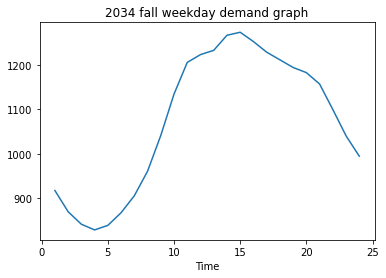

In [138]:
dm[YEAR-2021][DAY][SEASON].mean().plot(xlabel ='Time', title ='{} {} {} demand graph'.format(YEAR,season[SEASON],day[DAY]) )

In [139]:
supply = pd.read_csv("한국전력거래소_제주 연료원별 전력거래량_20220430.csv",encoding='CP949',index_col = 0, dayfirst=False, parse_dates=True)

In [140]:
sup_dict = {
    "biogas" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='바이오가스')],
    "solar" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='태양광')],
    "wind" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='풍력')],
    "small" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='소수력')],
    "land" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='매립가스')],
    "bunker" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='중유')],
    "waste" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='폐기물')],
    "lng" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='LNG')],
    "biobunker" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='바이오중유')],
    "ocean" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='해양에너지')],
    "biomass" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='바이오매스')],
    "diesel" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='경유')]
}
sup_list_before_hvdc = ['biogas','solar', 'wind', \
            'small', 'land', 'bunker', 'waste', 'lng', "biobunker", 'ocean', 'biomass', "diesel"]
sup_list = ['HVDC','biogas','solar', 'wind', \
            'small', 'land', 'bunker', 'waste', 'lng', "biobunker", 'ocean', 'biomass', "diesel"]
# sup_index = 
# coal = hard_coal.add(soft_coal)
# coal['거래시간'] = (coal['거래시간']/2).astype(int)
# coal['연료원'] = 'coal'

In [141]:
for key in sup_dict.keys():
    temp = sup_dict[key].sort_index().groupby(["거래시간"]).head(365)
    sup_dict[key] = temp.pivot(columns = '거래시간', values = "전력거래량(MWh)")

In [142]:
sup_dict['biobunker']

거래시간,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
거래일,,,,,,,,,,,,,,,,,,,,,
2021-01-01,101.170048,101.179008,101.177216,101.183936,101.180576,101.182816,101.175200,101.176768,101.174752,101.183936,...,101.185952,101.186400,101.176544,101.222016,120.407392,120.811712,119.389984,101.681440,101.687712,101.691072
2021-01-02,101.691968,101.697344,101.699360,101.694432,101.690400,101.692416,101.693536,101.711008,101.898048,101.894464,...,100.230368,102.002208,101.996832,101.991456,101.988992,101.986304,101.986528,101.985856,101.982048,101.975776
2021-01-03,101.985856,101.985408,101.978912,101.978688,101.975104,101.966368,101.969504,101.970624,101.966816,101.961440,...,101.968832,101.964352,101.961664,125.263936,120.229312,101.166912,101.164000,101.162208,101.166016,101.166688
2021-01-04,101.161536,101.163328,101.165120,101.166016,101.164448,101.162880,101.157504,101.162656,101.162432,101.158176,...,101.365600,101.373888,112.484960,130.509568,122.903200,120.757056,120.781024,106.438304,100.795296,100.787904
2021-01-05,100.788352,100.778496,100.782976,100.782304,100.772224,100.774016,100.772224,100.772448,100.777376,101.522400,...,101.606400,101.606848,101.598560,101.591616,110.949440,111.938400,101.684576,101.684352,101.678080,101.684576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,206.078264,206.037720,205.995328,206.071824,206.020304,205.943528,213.672424,224.195664,226.879632,220.890096,...,185.996496,202.996136,223.985384,241.972192,208.427800,205.583056,205.468032,205.548448,205.709336,205.693488
2021-12-28,205.438912,205.056040,205.079056,205.126488,205.044728,205.011744,205.119936,204.863512,215.543608,243.141528,...,205.174928,205.237032,205.334640,209.710928,227.158848,211.666392,205.396296,205.515632,205.699928,200.160184
2021-12-29,186.425008,186.400368,186.425512,186.420920,186.333616,186.298336,186.384968,188.406064,204.861272,204.765624,...,205.062312,222.677952,249.910528,264.320056,224.852376,205.812600,205.465624,193.046952,186.531968,186.549664


In [143]:
sup_dict['solar']*=1.6417246 # 여기서 *1.6417246 은 태양광에너지 총 발전량(ppa + 자가용발전+거래량)의 예측값

In [144]:
#공급 증가율 적용 (9차 전력수급기본계획의 연료원별 설비용량 증가율 적용)
rate = {}
for key in sup_list:
    if key == 'solar':
        rate[key] = 624/412
    elif key == 'wind':
        rate[key] = 624/412
    else:
        rate[key] = 98/91

In [145]:
#공급 예측량 fin_sup[year-2021][day][season]
fin_sup=[]

for year in range(2021,2035):
    i = year-2021
    fin_sup.append([  [ [],[],[],[] ], [ [],[],[],[] ]  ])
    for key in sup_dict.keys(): 
        x = sup_dict[key] + sup_dict[key]*(rate[key]-1)*(year-2021)/14 #연도별 공급증가율 적용
        #weekday                
        fin_sup[i][0][0].append(x[((x.index>='2021-03-01')&(x.index<'2021-06-01'))&(x.index.dayofweek<5)].mean())#spring
        fin_sup[i][0][1].append(x[((x.index>='2021-06-01')&(x.index<'2021-09-01'))&(x.index.dayofweek<5)].mean())#summer
        fin_sup[i][0][2].append(x[((x.index>='2021-09-01')&(x.index<'2021-12-01'))&(x.index.dayofweek<5)].mean())#fall
        fin_sup[i][0][3].append(x[((x.index<'2021-03-01')|('2021-11-30'<x.index))&(x.index.dayofweek<5)].mean())#winter                
        #weekend                
        fin_sup[i][1][0].append(x[((x.index>='2021-03-01')&(x.index<'2021-06-01'))&(x.index.dayofweek>4)].mean())#spring
        fin_sup[i][1][1].append(x[((x.index>='2021-06-01')&(x.index<'2021-09-01'))&(x.index.dayofweek>4)].mean())#summer
        fin_sup[i][1][2].append(x[((x.index>='2021-09-01')&(x.index<'2021-12-01'))&(x.index.dayofweek>4)].mean())#fall
        fin_sup[i][1][3].append(x[((x.index<'2021-03-01')|('2021-11-30'<x.index))&(x.index.dayofweek>4)].mean())#winter
    

In [146]:
fin_sup[0][0][0]

[거래시간
 1     0.268518
 2     0.258143
 3     0.239658
 4     0.224508
 5     0.212584
 6     0.216902
 7     0.243224
 8     0.263223
 9     0.270185
 10    0.264740
 11    0.257945
 12    0.266559
 13    0.261179
 14    0.245797
 15    0.235091
 16    0.230055
 17    0.235115
 18    0.278313
 19    0.316013
 20    0.335164
 21    0.336377
 22    0.334132
 23    0.317487
 24    0.295756
 dtype: float64,
 거래시간
 1       0.315780
 2       0.332585
 3       0.283779
 4       0.274024
 5       0.263509
 6       0.444274
 7       8.422282
 8      44.214391
 9     109.306662
 10    184.853822
 11    232.197030
 12    269.317941
 13    283.957652
 14    275.325380
 15    236.350972
 16    189.990157
 17    129.826180
 18     61.858215
 19     15.256426
 20     11.518895
 21     10.532722
 22      7.881051
 23      3.456720
 24      1.136043
 dtype: float64,
 거래시간
 1     47.545854
 2     45.518333
 3     47.390313
 4     50.492880
 5     53.445704
 6     61.795134
 7     58.444708
 8     56.674

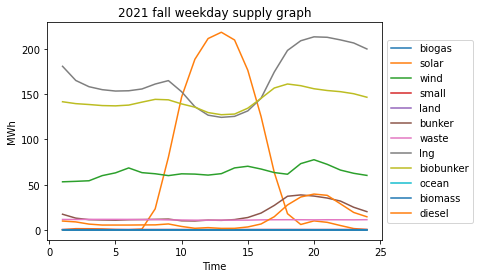

In [147]:
b = pd.DataFrame(fin_sup[2021-2021][DAY][SEASON])
g = b.T

sup_column = {}
for i, source in enumerate(sup_list_before_hvdc):
    sup_column[i] = source

g = g.rename(columns = sup_column)
g.plot(xlabel = 'Time',ylabel = 'MWh',title = '{} {} {} supply graph'.format(2021,season[SEASON],day[DAY])).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

Text(0, 0.5, 'Mwh')

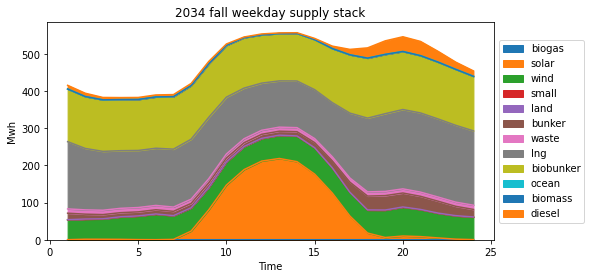

In [148]:
fig, axs = plt.subplots(figsize=(8, 4))  
g.plot.area(ax=axs, xlabel = 'Time',title= '{} {} {} supply stack'.format(YEAR,season[SEASON],day[DAY])).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
axs.set_ylabel("Mwh")

(0.0, 1000.0)

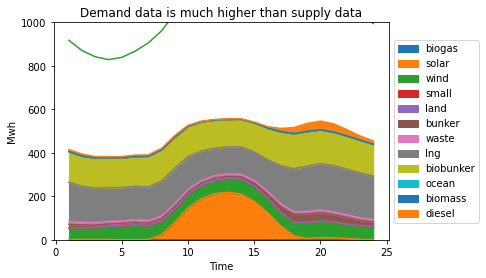

In [149]:
g.plot.area( xlabel = 'Time',ylabel = 'Mwh',title= 'Demand data is much higher than supply data').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.plot([i for i in range(1,25)],list(dm[YEAR-2021][DAY][SEASON].mean()))
plt.ylim(0,1000)

In [150]:
#수요와 공급이 불일치한다. 공급이 더 적은 양으로 나타난다. 누락된 공급량 통계(HVDC)가 있을 것이라고 생각했다.
#이 누락된 공급에너지를 HVDC으로 저장하였다.
#그리고 이 HVDC 공급 에너지가 수요의 증가량만큼 늘어난다고 가정하여 각 년도에 더해주었다.


sup_sum_list = [[],[]]
for i in range(2):
    for j in range(4):
        sup_sum = fin_sup[0][i][j][0]
        for k in range(1,len(fin_sup[0][i][j])):
            sup_sum = sup_sum + fin_sup[0][i][j][k]
        sup_sum_list[i].append(sup_sum)

unknown_sup = [[],[]]
for i in range(2):
    for j in range(4):
        unknown_sup[i].append(dm[0][i][j].mean() - sup_sum_list[i][j])

In [151]:
for i in range(0,14):
    #weekday                
    fin_sup[i][0][0].insert(0,unknown_sup[0][0])#spring
    fin_sup[i][0][1].insert(0,unknown_sup[0][1])#summer
    fin_sup[i][0][2].insert(0,unknown_sup[0][2])#fall
    fin_sup[i][0][3].insert(0,unknown_sup[0][3])#winter                
    #weekend                
    fin_sup[i][1][0].insert(0,unknown_sup[1][0])#spring
    fin_sup[i][1][1].insert(0,unknown_sup[1][1])#summer
    fin_sup[i][1][2].insert(0,unknown_sup[1][2])#fall
    fin_sup[i][1][3].insert(0,unknown_sup[1][3])#winter           

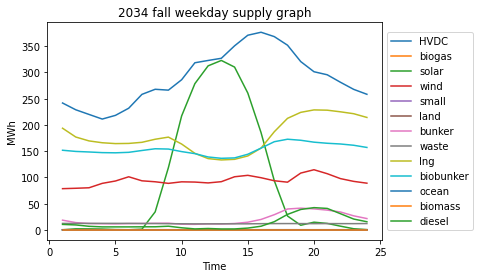

In [152]:
b = pd.DataFrame(fin_sup[YEAR-2021][DAY][SEASON])
g = b.T

sup_column = {}
for i, source in enumerate(sup_list):
    sup_column[i] = source

g = g.rename(columns = sup_column)
g.plot(xlabel = 'Time',ylabel = 'MWh',title = '{} {} {} supply graph'.format(YEAR,season[SEASON],day[DAY])).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

Text(0, 0.5, 'Mwh')

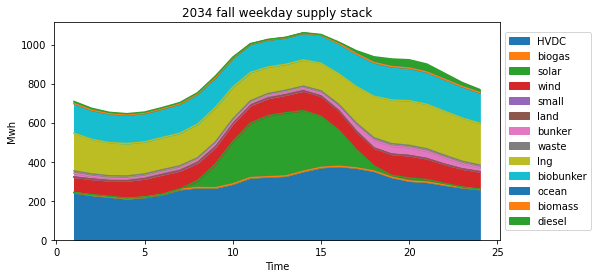

In [153]:
fig, axs = plt.subplots(figsize=(8, 4))  
g.plot.area(ax=axs, xlabel = 'Time',title= '{} {} {} supply stack'.format(YEAR,season[SEASON],day[DAY])).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
axs.set_ylabel("Mwh")

In [154]:
up_to_wind = fin_sup[YEAR-2021][DAY][SEASON][0]
for i in range(1,13):
    up_to_wind = up_to_wind + fin_sup[YEAR-2021][DAY][SEASON][i]

In [155]:
diff = dm[YEAR-2021][DAY][SEASON].mean()-up_to_wind

In [156]:
oversupply = 0
for i in diff:
    if i<0:
        oversupply -= i
print('oversupply=', oversupply)

oversupply= 0
